In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1. Preparing the datasets

In [2]:
df = pd.read_csv('Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
# Check unique values to see the categories
df['fuel'].unique(), df['seller_type'].unique(), df['transmission'].unique(), df['owner'].unique()

(array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object),
 array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object),
 array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object))

In [4]:
print("Dataset shape before dropping nan values: ", df.shape)

Dataset shape before dropping nan values:  (8128, 13)


In [5]:
df = df.dropna()
print("Dataset shape before after dropping nan values: ", df.shape)

Dataset shape before after dropping nan values:  (7906, 13)


#### For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [6]:
# Define a mapping for categorical 'owner' values to numeric values
owner_map = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

# Apply the mapping to the 'owner' column
# This replaces the categorical strings in 'owner' with their corresponding numeric values
df['owner'] = df['owner'].map(owner_map)

# Display unique values in the 'owner' column after mapping
# This helps verify that the mapping was applied correctly
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [7]:
# For the feature fuel, remove all rows with CNG and LPG 
# because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol
df = df[~df["fuel"].isin(["CNG", "LPG"])]
df.shape

(7819, 13)

In [8]:
# # For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
df.mileage = df.mileage.str.split(' ').map(lambda x: float(x[0]))

In [9]:
# For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df.engine = df.engine.str.split(' ').map(lambda x: float(x[0]))

In [10]:
# Do the same for max power
df.max_power = df.max_power.str.split(' ').map(lambda x: float(x[0]))

In [11]:
# For the feature brand, take only the first word and remove the rest
df.name = df.name.str.split(' ').map(lambda x: x[0])

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
# Drop the feature torque
df = df.drop('torque', axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [14]:
# Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.
df = df.drop(df[df['owner'] == 5].index)

In [15]:
df.shape

(7814, 12)

In [16]:
df.owner.unique()

array([1, 2, 3, 4])

In [17]:
import numpy as np

# Since selling price is a big number, it can cause your prediction to be very unstable. One trick is to first transform the label using log transform
y = np.log(df.selling_price)

In [18]:
# Final Data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [19]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,7814.000000,7.814000e+03,7.814000e+03,7814.000000,7814.000000,7814.000000,7814.000000,7814.000000
mean,2013.987074,6.515864e+05,6.916070e+04,1.443819,19.391962,1462.914640,91.890230,5.421551
std,3.864426,8.097971e+05,5.687495e+04,0.704962,4.001972,504.759742,35.727695,0.963125
min,1994.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,34.200000,2.000000
25%,2012.000000,2.700000e+05,3.400000e+04,1.000000,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.550000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.950000e+05,9.600000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


## Exploratory Data Analysis

### Countplot

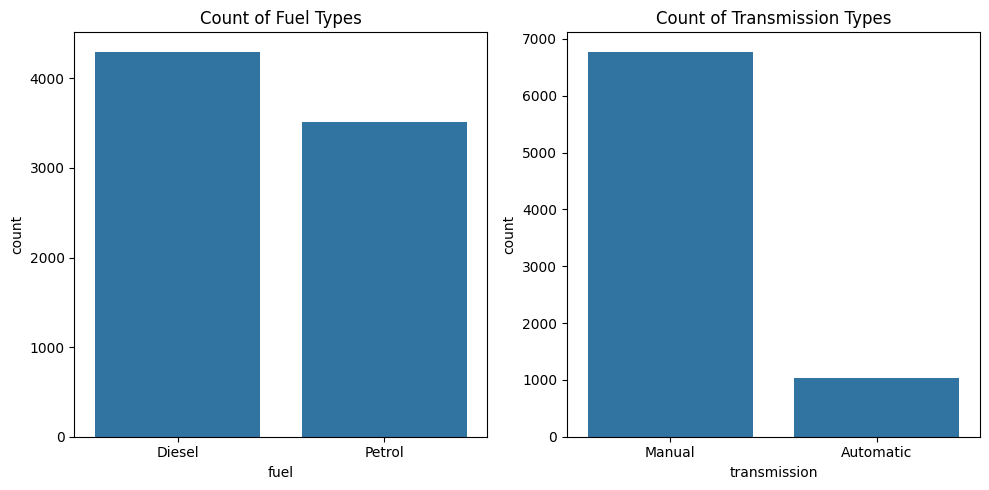

In [20]:
# Create a figure with 1 row and 2 columns of subplots, and set the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot a countplot for the 'fuel' column on the first subplot (ax1)
sns.countplot(data=df, x='fuel', ax=ax1)
ax1.set_title('Count of Fuel Types')  # Set title for the first subplot

# Plot a countplot for the 'transmission' column on the second subplot (ax2)
sns.countplot(data=df, x='transmission', ax=ax2)
ax2.set_title('Count of Transmission Types')  # Set title for the second subplot

# Show the plots
plt.tight_layout()  # Adjust subplot spacing to prevent overlap
plt.show()

### Distribution plot

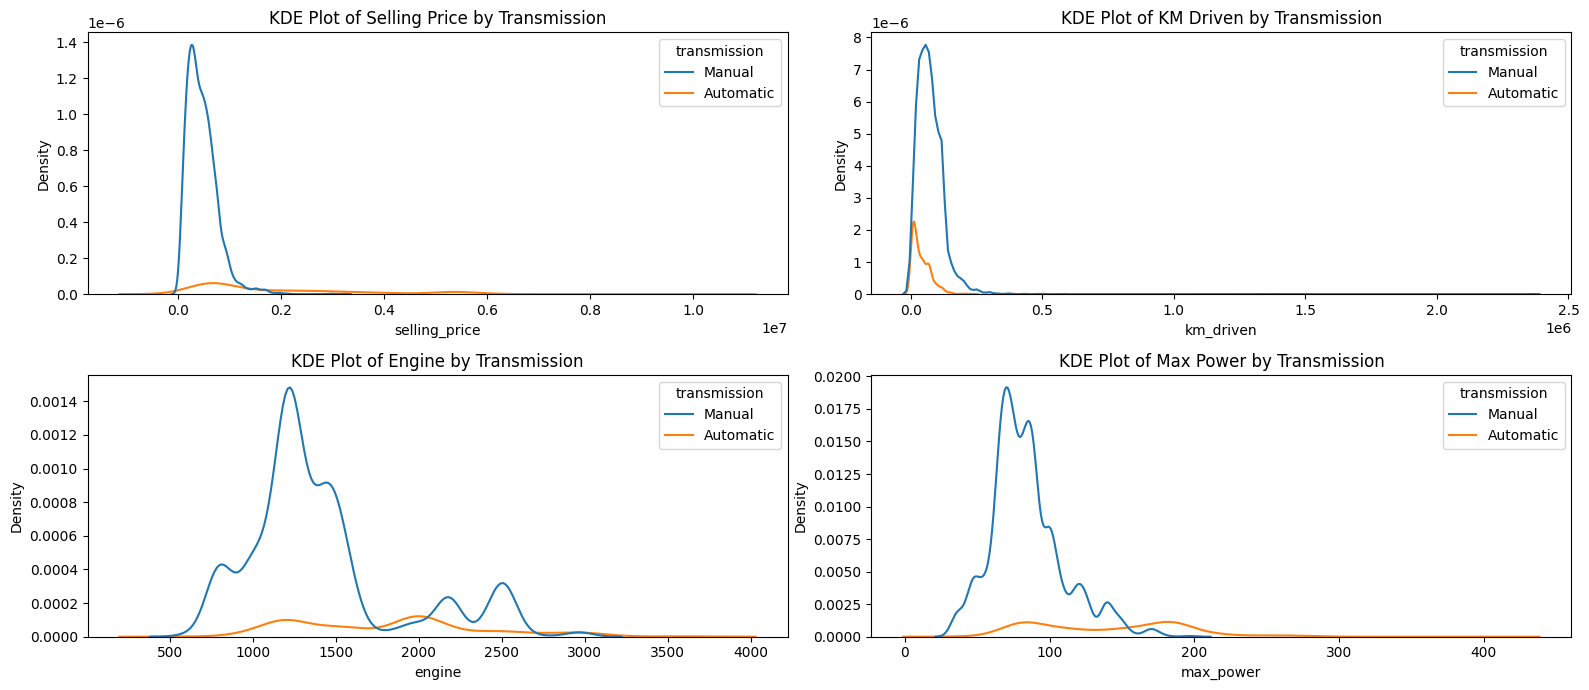

In [21]:
# Create a 2x2 grid of subplots with a specified figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 7))

# Plot a KDE plot for 'selling_price' with 'transmission' as the hue, on the first subplot (ax1)
sns.kdeplot(data=df, x="selling_price", hue="transmission", ax=ax1)
ax1.set_title("KDE Plot of Selling Price by Transmission")  # Add a title for ax1

# Plot a KDE plot for 'km_driven' with 'transmission' as the hue, on the second subplot (ax2)
sns.kdeplot(data=df, x="km_driven", ax=ax2, hue="transmission")
ax2.set_title("KDE Plot of KM Driven by Transmission")  # Add a title for ax2

# Plot a KDE plot for 'engine' with 'transmission' as the hue, on the third subplot (ax3)
sns.kdeplot(data=df, x="engine", hue="transmission", ax=ax3)
ax3.set_title("KDE Plot of Engine by Transmission")  # Add a title for ax3

# Plot a KDE plot for 'max_power' with 'transmission' as the hue, on the fourth subplot (ax4)
sns.kdeplot(data=df, x="max_power", hue="transmission", ax=ax4)
ax4.set_title("KDE Plot of Max Power by Transmission")  # Add a title for ax4

# Adjust layout to prevent overlap between plots and titles
plt.tight_layout()

# Display the plots
plt.show()


### Lineplot

Text(0.5, 1.0, 'Trend of Selling Price vs Year by Transmission Type')

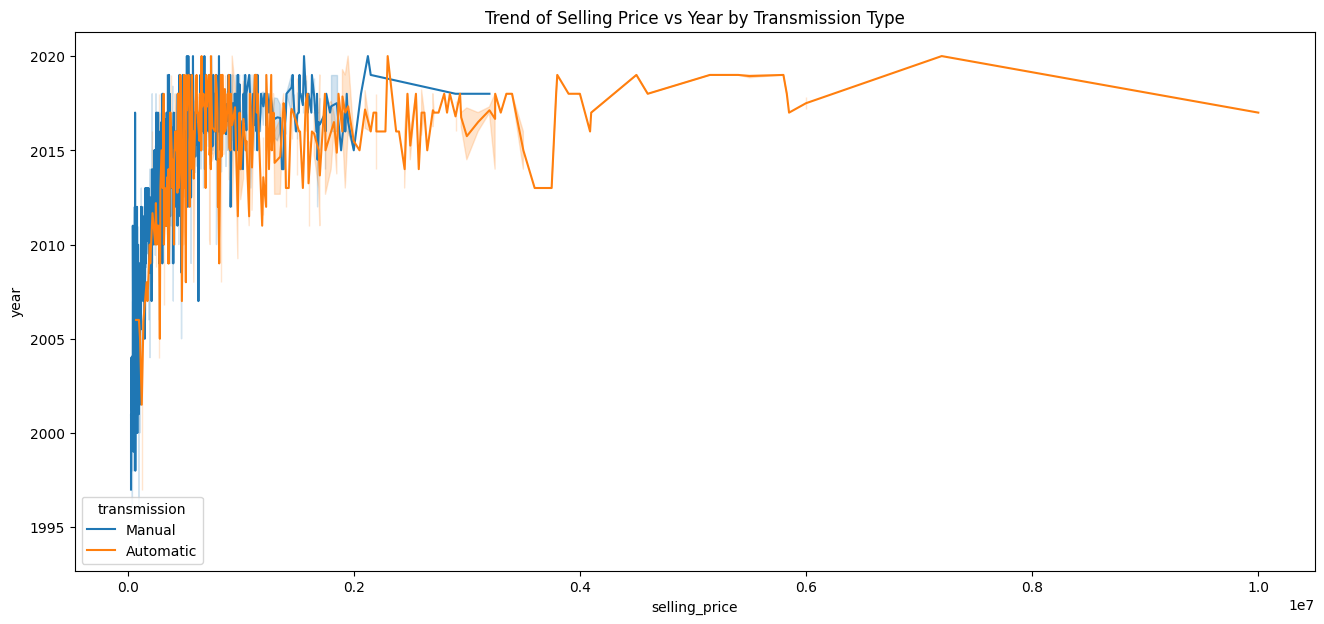

In [22]:
plt.figure(figsize=(16, 7))
sns.lineplot(data=df, x="selling_price", y="year", hue="transmission")
plt.title("Trend of Selling Price vs Year by Transmission Type")

### Boxplot

Text(0.5, 0, 'Seller Type')

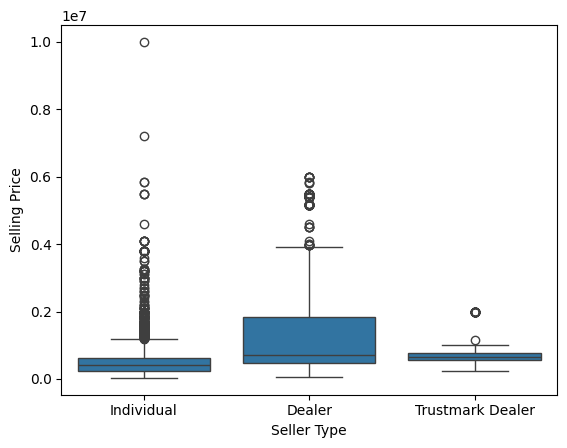

In [23]:
sns.boxplot(x = df["seller_type"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

### Scatter plot

<Axes: xlabel='km_driven', ylabel='selling_price'>

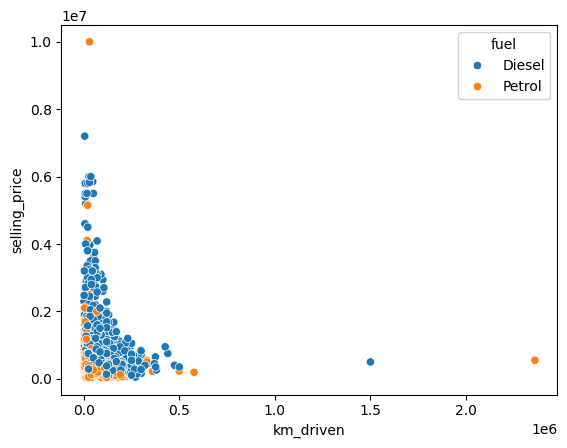

In [24]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['fuel'])

### Label Encode

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])

### Correlation Matrix

<Axes: >

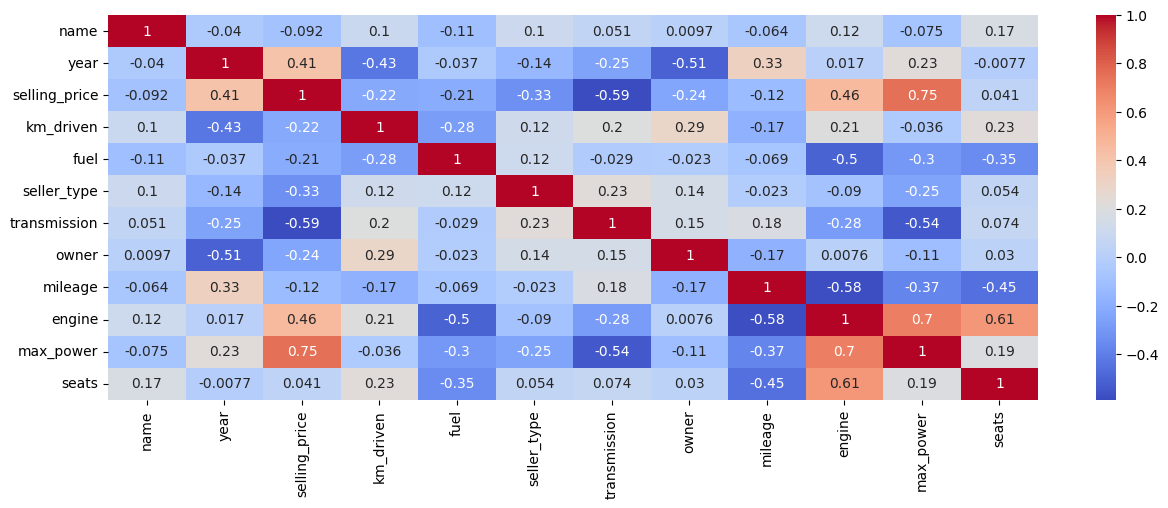

In [26]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Feature Engineering

### Feature Selection

In [27]:
X = df[['year', 'transmission', 'engine', 'max_power']]
y = np.log(df['selling_price'])

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 102)

### Checking Outliers

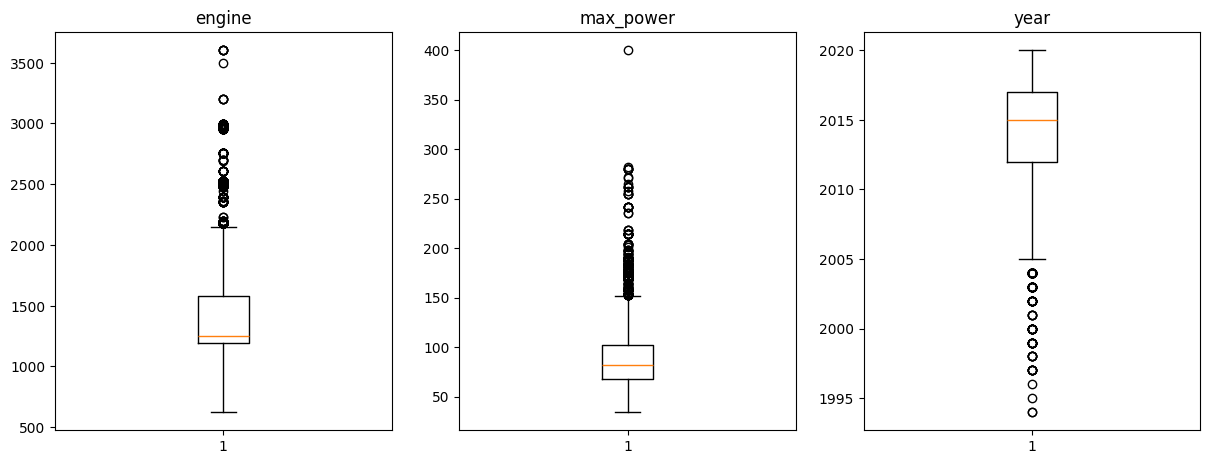

In [29]:
# Create a dictionary of columns.
col_dict = {'engine': 1,'max_power': 2, 'year': 3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
    plt.subplot(5,4,i)
    plt.boxplot(X_train[variable])
    plt.title(variable)

plt.show()

In [30]:
# Checking outlier value
X_train[X_train.max_power > 350]

,year,transmission,engine,max_power
170,2017,0,1969.0,400.0


In [31]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [32]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 119
Percent of data that is outlier: 2.18%

---------------transmission---------------

Number of outliers: 718
Percent of data that is outlier: 13.13%

---------------engine---------------

Number of outliers: 825
Percent of data that is outlier: 15.09%

---------------max_power---------------

Number of outliers: 381
Percent of data that is outlier: 6.97%


### Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Save scaler

In [34]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Modelling

In [35]:
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [36]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09563684 -0.09938917 -0.10192946 -0.09893605 -0.10643761]; Mean: -0.10046582579181969
SVR - Score: [-0.07552298 -0.07486538 -0.07792811 -0.08799222 -0.07573074]; Mean: -0.07840788580537728
KNeighbors Regressor - Score: [-0.06681506 -0.05501299 -0.06210385 -0.05836088 -0.0605611 ]; Mean: -0.06057077421219156
Decision-Tree Regressor - Score: [-0.06438693 -0.06390182 -0.05932951 -0.06105269 -0.06666228]; Mean: -0.06306664624783329
Random-Forest Regressor - Score: [-0.0573457  -0.05335236 -0.0460471  -0.05026957 -0.05740911]; Mean: -0.052884767302820455


#### Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [38]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 15}

In [39]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse

-0.05325192992618407

### Testing

In [40]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid.predict(X_test)
mean_squared_error(y_test, y_pred)

0.048396240278733516

In [41]:
r2_score(y_test, y_pred)

0.9316691796514047

### Feature Importance

In [42]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.45987633, 0.00292227, 0.07070471, 0.46649669])

<BarContainer object of 4 artists>

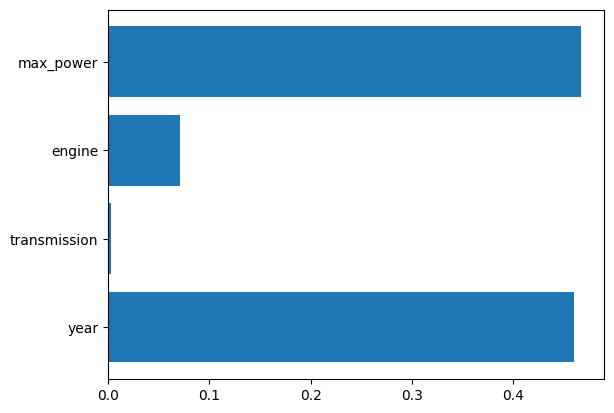

In [43]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

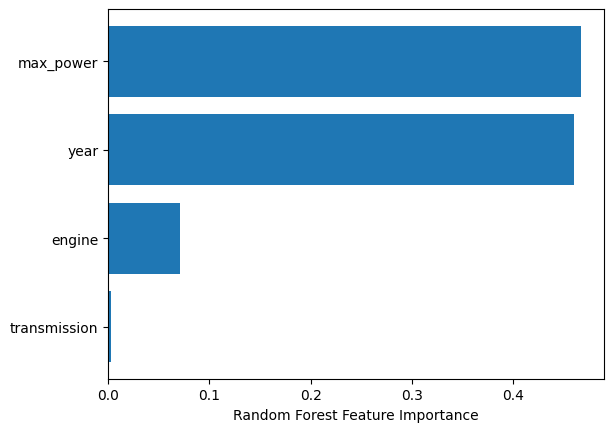

In [44]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### SHAP

In [45]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

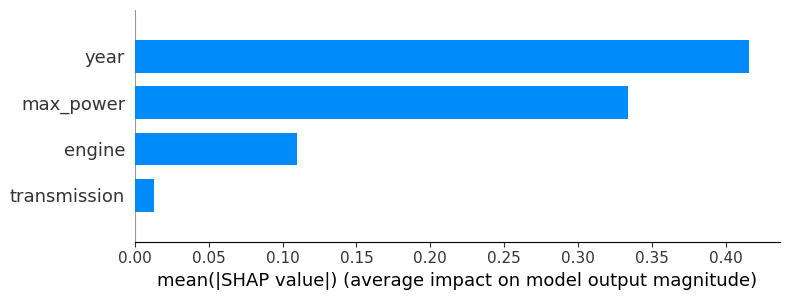

In [46]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

### Inference

In [47]:
import pickle

# save the model to disk
filename = 'car_price_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [48]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [49]:
df[['year', 'transmission', 'engine', 'max_power']].loc[2]

year            2006.0
transmission       1.0
engine          1497.0
max_power         78.0
Name: 2, dtype: float64

In [50]:
fields = ['year', 'transmission', 'engine', 'max_power']
# Prompt user for input
user_input = []
for field in fields:
    value = float(input(f"Enter {field}: "))  # Convert input to float
    user_input.append(value)

# Convert the input to a NumPy array
sample = np.array([user_input])
sample_scaled = scaler.transform(sample)

predicted_life_exp = loaded_model.predict(sample_scaled)
print(f"Predicted car price: {np.exp(predicted_life_exp)}")

Enter year:  2006
Enter transmission:  1
Enter engine:  1497
Enter max_power:  78


Predicted car price: [166107.4644527]


/Users/luhtookyaw/anaconda3/envs/pt-env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Report